In [84]:
import pandas as pd
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/data/content/drive/MyDrive/penguins.csv')

df.head()

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [85]:
df_tratado = df.copy()

In [86]:
df_tratado = df_tratado.drop(columns=['id', 'year'])

In [87]:
df_tratado.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [88]:
df_tratado.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [89]:
df_tratado = df_tratado.dropna()

In [90]:
df_tratado.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [91]:
df_correlacao = df_tratado.copy()

In [92]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df_correlacao.columns:
  if df_correlacao[column].dtype == type(object):
    df_correlacao[column] = le.fit_transform(df_tratado[column])

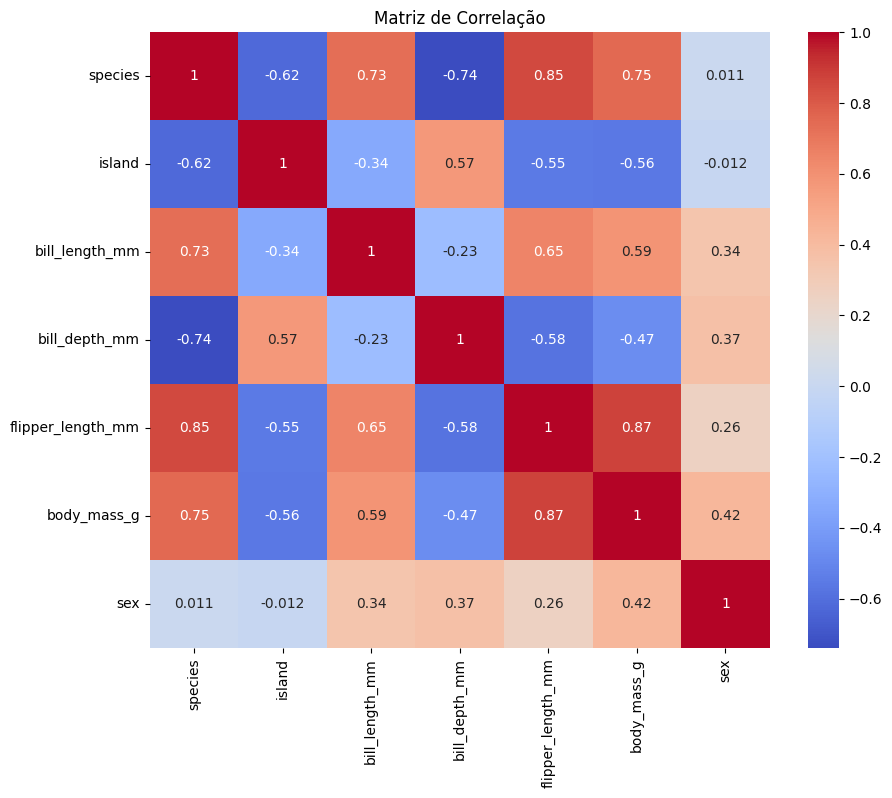

In [93]:
correlation_matrix = df_correlacao.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [94]:
df_tratado = df_tratado.drop(columns=['sex'])

In [95]:
df_tratado.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0


<Axes: >

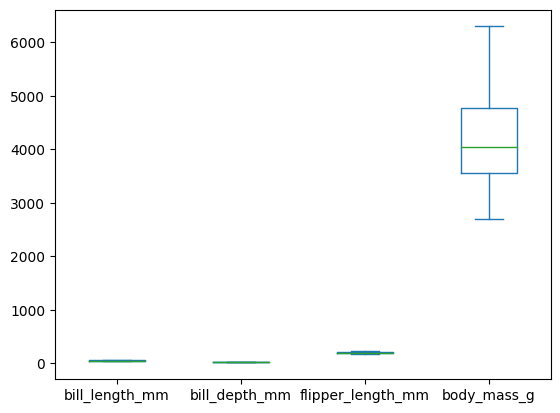

In [96]:
df_tratado.plot(kind = "box")

In [97]:
from sklearn.preprocessing import Normalizer

df_tratado[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = Normalizer().fit_transform(df_tratado[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
df_tratado

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,0.010414,0.004981,0.048207,0.998771
1,Adelie,Torgersen,0.010382,0.004573,0.048886,0.998740
2,Adelie,Torgersen,0.012377,0.005528,0.059887,0.998113
4,Adelie,Torgersen,0.010620,0.005585,0.055851,0.998367
5,Adelie,Torgersen,0.010752,0.005636,0.051981,0.998574
...,...,...,...,...,...,...
339,Chinstrap,Dream,0.013930,0.004943,0.051675,0.998555
340,Chinstrap,Dream,0.012770,0.005314,0.059302,0.998144
341,Chinstrap,Dream,0.013121,0.004814,0.051054,0.998598
342,Chinstrap,Dream,0.012373,0.004628,0.051148,0.998604


<Axes: >

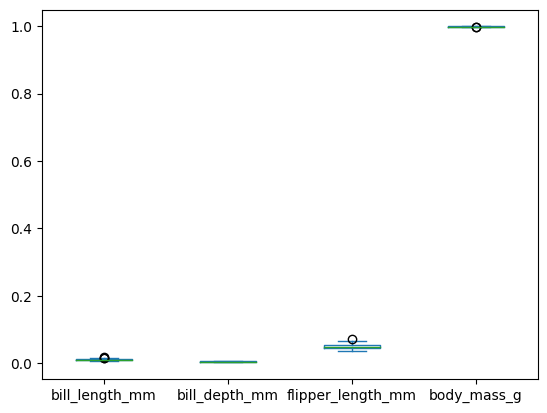

In [98]:
df_tratado.plot(kind = "box")

In [99]:
df_tratado.to_csv('penguins_com_outliers.csv', index=False)


In [100]:
df_tratado_outliers = df_tratado.copy()

x = df_tratado_outliers.drop(columns=['species', 'island'])

q1 = x.quantile(0.25)
q3 = x.quantile(0.75)
iqr = q3 - q1
lLim = q1 - 1.5 * iqr
hLim = q3 + 1.5 * iqr

for col in x.columns:
    df_tratado_outliers.loc[df_tratado[col] < lLim[col], col] = lLim[col]
    df_tratado_outliers.loc[df_tratado[col] > hLim[col], col] = hLim[col]

<Axes: >

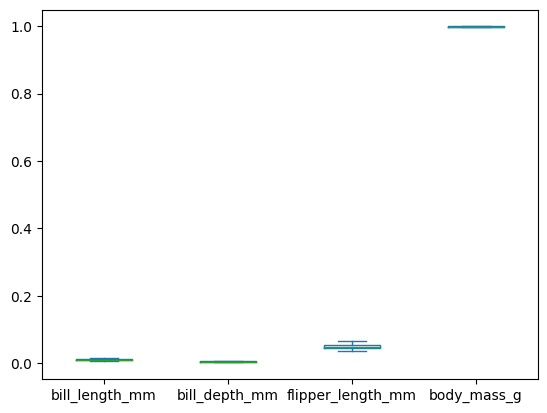

In [101]:
df_tratado_outliers.plot(kind = "box")

In [102]:
df_tratado_outliers.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,0.010414,0.004981,0.048207,0.998771
1,Adelie,Torgersen,0.010382,0.004573,0.048886,0.998740
2,Adelie,Torgersen,0.012377,0.005528,0.059887,0.998113
4,Adelie,Torgersen,0.010620,0.005585,0.055851,0.998367
5,Adelie,Torgersen,0.010752,0.005636,0.051981,0.998574


In [103]:
df_tratado_outliers.to_csv('./data/penguins_sem_outliers.csv', index=False)
